In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import scipy.stats as stats

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seabor graphs to a better style
sns.set(style="ticks")

### 1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.

In [2]:
cust_data = pd.read_csv("C:\\Users\\kavit\\Desktop\\Laxman- Analytix labs\\Python\\Python Case Study\\Case Study-5\\Original file\\cust_demographics.csv")

claims_data = pd.read_csv("C:\\Users\\kavit\\Desktop\\Laxman- Analytix labs\\Python\\Python Case Study\\Case Study-5\\Original file\\claims.csv")

In [3]:
cust_data.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold


In [4]:
claims_data.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No


In [5]:
cust_claims_data = cust_data.merge(claims_data, how = 'outer', left_on = 'CUST_ID', right_on = 'customer_id')

In [6]:
cust_claims_data.drop(columns = 'customer_id', inplace = True)

In [7]:
cust_claims_data.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593.0,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764.0,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424.0,Female,13-Jan-70,ME,265-543-1264,Silver,33985796.0,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,53522022.0,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,63017412.0,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No
4,47830476.0,Female,01-May-86,MA,413-187-7945,Silver,13015401.0,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No


### 2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance.

In [8]:
cust_claims_data.dtypes

CUST_ID                float64
gender                  object
DateOfBirth             object
State                   object
Contact                 object
Segment                 object
claim_id               float64
incident_cause          object
claim_date              object
claim_area              object
police_report           object
claim_type              object
claim_amount            object
total_policy_claims    float64
fraudulent              object
dtype: object

In [9]:
cust_claims_data['DateOfBirth'] = pd.to_datetime(cust_claims_data.DateOfBirth, format = '%d-%b-%y')

cust_claims_data['claim_date'] = pd.to_datetime(cust_claims_data.claim_date, format = '%m/%d/%Y')


In [10]:
dte = pd.DateOffset(years = 100)

cust_claims_data['DateOfBirth'] = np.where((cust_claims_data['DateOfBirth'].dt.year) > 2023, 
                                           cust_claims_data['DateOfBirth'] - dte, cust_claims_data['DateOfBirth'])

In [11]:
cust_claims_data.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593.0,Female,1979-01-12,VT,789-916-8172,Platinum,54004764.0,Driver error,2017-11-27,Auto,No,Material only,$2980,1.0,No
1,75740424.0,Female,1970-01-13,ME,265-543-1264,Silver,33985796.0,Crime,2018-10-03,Home,Unknown,Material only,$2980,3.0,No
2,30308357.0,Female,1984-03-11,TN,798-631-4758,Silver,53522022.0,Other driver error,2018-02-02,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357.0,Female,1984-03-11,TN,798-631-4758,Silver,63017412.0,Driver error,2018-04-04,Auto,No,Material only,$1950,6.0,No
4,47830476.0,Female,1986-05-01,MA,413-187-7945,Silver,13015401.0,Natural causes,2018-06-17,Auto,No,Material only,$1680,1.0,No


### 3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign.

In [12]:
cust_claims_data['claim_amount'] = pd.to_numeric(cust_claims_data['claim_amount'].str.replace('$', ' '))

In [13]:
cust_claims_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1107 entries, 0 to 1106
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CUST_ID              1092 non-null   float64       
 1   gender               1092 non-null   object        
 2   DateOfBirth          1092 non-null   datetime64[ns]
 3   State                1092 non-null   object        
 4   Contact              1092 non-null   object        
 5   Segment              1092 non-null   object        
 6   claim_id             1100 non-null   float64       
 7   incident_cause       1100 non-null   object        
 8   claim_date           1100 non-null   datetime64[ns]
 9   claim_area           1100 non-null   object        
 10  police_report        1100 non-null   object        
 11  claim_type           1100 non-null   object        
 12  claim_amount         1035 non-null   float64       
 13  total_policy_claims  1090 non-nul

### 4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.
 

In [14]:
cust_claims_data['alert_flag'] = np.where(cust_claims_data.police_report == 'Yes', 1, 
                                          np.where(cust_claims_data.police_report == 'No', 0, 'NaN'))

In [15]:
cust_claims_data.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,alert_flag
0,21868593.0,Female,1979-01-12,VT,789-916-8172,Platinum,54004764.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0
1,75740424.0,Female,1970-01-13,ME,265-543-1264,Silver,33985796.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,NaN
2,30308357.0,Female,1984-03-11,TN,798-631-4758,Silver,53522022.0,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,0
3,30308357.0,Female,1984-03-11,TN,798-631-4758,Silver,63017412.0,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,0
4,47830476.0,Female,1986-05-01,MA,413-187-7945,Silver,13015401.0,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,0


### 5. One customer can claim for insurance more than once and in each claim, multiple categories of claims can be involved. However, customer ID should remain unique. 

In [16]:
cust_claims_data.sort_values(by = 'claim_date', inplace = True)

In [17]:
cust_claims_data.drop_duplicates(subset = 'CUST_ID', keep = 'last', inplace = True)

In [18]:
cust_claims_data.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,alert_flag
334,22756942.0,Male,1982-10-09,FL,462-823-3126,Silver,70512964.0,Driver error,2017-01-01,Auto,Yes,Injury only,20310.0,1.0,No,1
383,25634799.0,Female,1974-11-04,KS,724-781-3692,Platinum,36457152.0,Driver error,2017-01-01,Auto,No,Material only,2900.0,2.0,No,0
746,29323970.0,Male,1971-03-03,NE,783-653-9163,Gold,58878919.0,Driver error,2017-01-01,Auto,Unknown,Material only,1840.0,1.0,Yes,NaN
181,61745840.0,Female,1994-07-24,MA,612-684-5472,Platinum,90591192.0,Other driver error,2017-01-01,Home,No,Material and injury,30930.0,1.0,No,0
312,65176092.0,Male,1975-11-23,NC,651-379-2486,Silver,9476314.0,Other causes,2017-01-01,Auto,No,Material and injury,37290.0,3.0,No,0


### 6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [19]:
cust_claims_data.isna().sum()

CUST_ID                 1
gender                  1
DateOfBirth             1
State                   1
Contact                 1
Segment                 1
claim_id                7
incident_cause          7
claim_date              7
claim_area              7
police_report           7
claim_type              7
claim_amount           72
total_policy_claims    17
fraudulent              7
alert_flag              0
dtype: int64

In [20]:
cat_var = ['gender', 'State', 'Segment', 'incident_cause', 'claim_area', 'police_report', 
           'claim_type', 'total_policy_claims', 'fraudulent', 'alert_flag']

In [21]:
for i in cat_var:
    cust_claims_data[i] = cust_claims_data[i].fillna(cust_claims_data[i].mode()[0])

In [22]:
cust_claims_data['claim_amount'] = cust_claims_data.claim_amount.fillna(cust_claims_data.claim_amount.mean())

In [23]:
cust_claims_data.isna().sum()

CUST_ID                1
gender                 0
DateOfBirth            1
State                  0
Contact                1
Segment                0
claim_id               7
incident_cause         0
claim_date             7
claim_area             0
police_report          0
claim_type             0
claim_amount           0
total_policy_claims    0
fraudulent             0
alert_flag             0
dtype: int64

### 7. Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria
#### Children < 18
#### Youth 18-30
#### Adult 30-60
#### Senior > 60


In [24]:
cust_claims_data['Age'] = round((dt.datetime.today() - cust_claims_data.DateOfBirth)/np.timedelta64(1, 'Y'))

In [25]:
cust_claims_data['Age_groups'] = np.where(cust_claims_data.Age < 18, 'Children', np.where(cust_claims_data.Age.between(18, 30), 
                                                         'Youth', np.where(cust_claims_data.Age.between(31, 60), 'Adult', 'Senior')))

In [26]:
cust_claims_data.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,alert_flag,Age,Age_groups
334,22756942.0,Male,1982-10-09,FL,462-823-3126,Silver,70512964.0,Driver error,2017-01-01,Auto,Yes,Injury only,20310.0,1.0,No,1,41.0,Adult
383,25634799.0,Female,1974-11-04,KS,724-781-3692,Platinum,36457152.0,Driver error,2017-01-01,Auto,No,Material only,2900.0,2.0,No,0,49.0,Adult
746,29323970.0,Male,1971-03-03,NE,783-653-9163,Gold,58878919.0,Driver error,2017-01-01,Auto,Unknown,Material only,1840.0,1.0,Yes,NaN,52.0,Adult
181,61745840.0,Female,1994-07-24,MA,612-684-5472,Platinum,90591192.0,Other driver error,2017-01-01,Home,No,Material and injury,30930.0,1.0,No,0,29.0,Youth
312,65176092.0,Male,1975-11-23,NC,651-379-2486,Silver,9476314.0,Other causes,2017-01-01,Auto,No,Material and injury,37290.0,3.0,No,0,48.0,Adult


### 8. What is the average amount claimed by the customers from various segments?

In [27]:
cust_claims_data.groupby('Segment')['claim_amount'].mean().reset_index()

,Segment,claim_amount
0,Gold,12818.157783
1,Platinum,12372.257388
2,Silver,12269.026404


### 9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.


In [28]:
dte1 = pd.DateOffset(days = 20)

cust_claims_data[cust_claims_data.claim_date < (pd.to_datetime('01-10-2018', format = '%d-%m-%Y') - 
                                                dte1)].groupby('incident_cause')['claim_amount'].sum().reset_index()

,incident_cause,claim_amount
0,Crime,7.218912e+05
1,Driver error,3.315737e+06
2,Natural causes,1.312902e+06
3,Other causes,3.722971e+06
4,Other driver error,3.277413e+06


### 10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes?

In [29]:
cust_claims_data[((cust_claims_data.State == 'TX') | (cust_claims_data.State == 'DE') | (cust_claims_data.State == 'AK')) 
                 & (cust_claims_data.Age_groups == 'Adult') & ((cust_claims_data.incident_cause == 'Driver error') | 
                                                               (cust_claims_data.incident_cause == 'Other driver error'))].groupby('State')['State'].count()

State
AK     8
DE    10
TX     9
Name: State, dtype: int64

### 11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.

In [30]:
gender_segment_wise_claim = pd.crosstab(cust_claims_data.gender, cust_claims_data.Segment, 
                                        values = cust_claims_data.claim_amount, aggfunc = 'sum')

Text(0.5, 0.75, 'Gender-Wise claim amount in each segment')

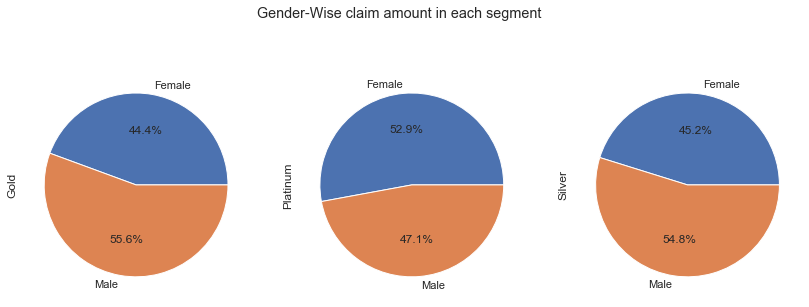

In [31]:
gender_segment_wise_claim.plot(kind = 'pie', subplots = True, figsize = (14, 10), legend = None, autopct = '%1.1f%%')

plt.suptitle('Gender-Wise claim amount in each segment', y = 0.75)

### 12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart

In [32]:
gender_incident_wise_claim = pd.crosstab(cust_claims_data.gender, cust_claims_data.incident_cause, 
                                         values = cust_claims_data.claim_amount, aggfunc = 
                                         'count').loc[ : : , ('Driver error', 'Other driver error')].sum(axis = 1)

<AxesSubplot:title={'center':'Gender-Wise claims for driver related issues'}, xlabel='gender', ylabel='No. of Claims'>

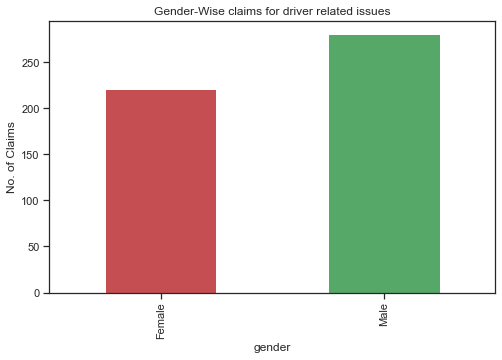

In [33]:
gender_incident_wise_claim.plot(kind = 'bar', ylabel = 'No. of Claims', 
                                title = 'Gender-Wise claims for driver related issues', figsize = (8, 5), color = ['r', 'g'])

### 13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart

In [34]:
age_group_wise_fraud_claims = cust_claims_data.groupby('Age_groups')['fraudulent'].count()

<AxesSubplot:title={'center':'Age group-Wise fraud claims'}, xlabel='Age_groups', ylabel='No. of claims'>

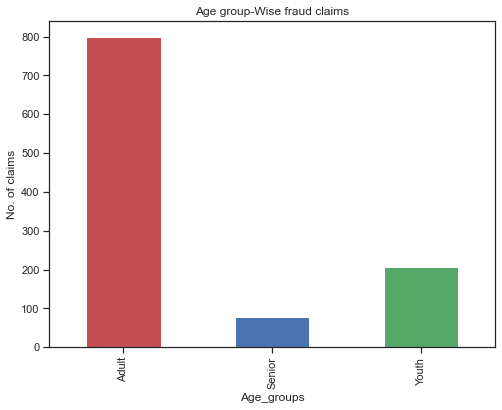

In [35]:
age_group_wise_fraud_claims.plot(kind = 'bar', color = ['r', 'b', 'g'], title = 'Age group-Wise fraud claims', 
                                 ylabel = 'No. of claims', figsize = (8, 6))

### 14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order. 

In [36]:
month_wise_claim_amount = cust_claims_data.groupby(cust_claims_data.claim_date.dt.strftime('%b'))['claim_amount'].sum().reset_index().set_index('claim_date')

In [37]:
month_wise_claim_amount = month_wise_claim_amount.loc[('Jan', 'Feb', 'Mar', 'Apr', 
                                                       'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'), : : ]

<AxesSubplot:title={'center':'Month-Wise claim amount'}, xlabel='claim_date', ylabel='Claim Amount(in millions)'>

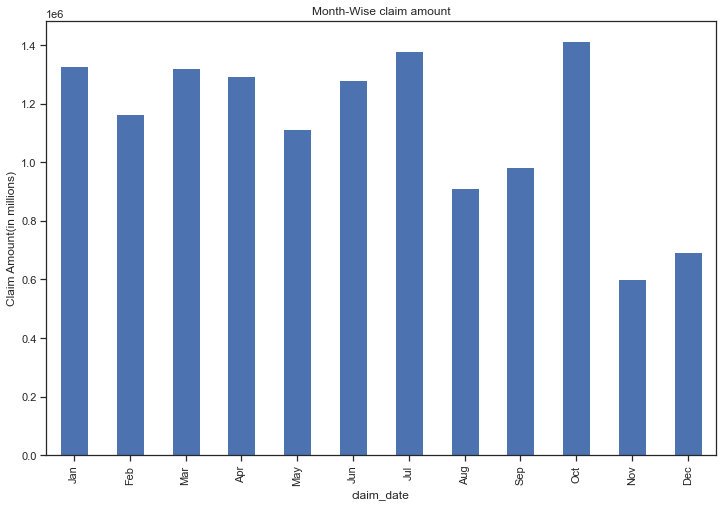

In [38]:
month_wise_claim_amount.plot(kind = 'bar', figsize = (12, 8), legend = None, ylabel = 'Claim Amount(in millions)', 
                            title = 'Month-Wise claim amount')

### 15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.


In [39]:
gender_age_wise_claim = pd.crosstab(index = [cust_claims_data.gender, cust_claims_data.Age_groups], 
                                    columns = cust_claims_data.fraudulent, values = cust_claims_data.claim_amount, aggfunc = 'mean')

Text(0.5, 0.98, 'Gender & Age-group wise average claim amount')

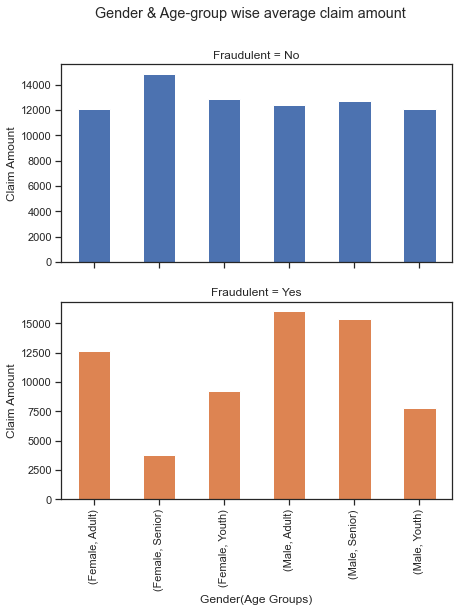

In [40]:
ax = gender_age_wise_claim.plot(kind = 'bar', figsize = (7, 8), subplots = True, 
                           legend = None, xlabel = 'Gender(Age Groups)', ylabel = 'Claim Amount')

ax[0].set_title('Fraudulent = No')
ax[1].set_title('Fraudulent = Yes')

plt.suptitle('Gender & Age-group wise average claim amount')

### Based on the conclusions from exploratory analysis as well as suitable statistical tests, answer the below questions. Please include a detailed write-up on the parameters taken into consideration, the Hypothesis testing steps, conclusion from the p-values and the business implications of the statements.

### 16. Is there any similarity in the amount claimed by males and females?

##### 1.Define Null Hypothesis, H0:

                      u1 != u2
                        or
      Amount claimed by males and females are not related


##### 2. Define Alternate Hypothesis, Ha:

                      u1 = u2
                        or
      Amount claimed by males and females are related

##### 3. Define CI & p value:


      CI = 95%
      p values = 0.05

##### 4. Perform the test:

      T test

In [42]:
male_claim_amount = cust_claims_data.loc[cust_claims_data.gender == 'Male', 'claim_amount']

In [43]:
female_claim_amount = cust_claims_data.loc[cust_claims_data.gender == 'Female', 'claim_amount']

In [44]:
male_claim_amount.head(2)

334    20310.0
746     1840.0
Name: claim_amount, dtype: float64

In [45]:
female_claim_amount.head(2)

383     2900.0
181    30930.0
Name: claim_amount, dtype: float64

In [46]:
stats.ttest_ind(male_claim_amount, female_claim_amount)

Ttest_indResult(statistic=0.9406711405771202, pvalue=0.3470829816232255)

##### 5. Rejection Rule:
      The new p value > 0.05
                Hence, Do not reject H0!

##### 6. Business Conclusion:
      There is no relationship between the amount claimed by males and females.

### 17. Is there any relationship between age category and segment?

##### 1.Define Null Hypothesis, H0:


      Age-group and Segment are not related


##### 2. Define Alternate Hypothesis, Ha:


      Age-group and Segment are related

##### 3. Define CI & p value:


      CI = 95%
      p values = 0.05

##### 4. Perform the test:

      chi square test

In [47]:
Age_group_segment_wise_obs = pd.crosstab(cust_claims_data.Age_groups, cust_claims_data.Segment)

In [48]:
Age_group_segment_wise_obs

Segment,Gold,Platinum,Silver
Age_groups,,,
Adult,274,268,258
Senior,30,26,22
Youth,69,70,69


In [49]:
stats.chi2_contingency(Age_group_segment_wise_obs)

(0.9200178879603487,
 0.9216715251798087,
 4,
 array([[274.76979742, 268.13996317, 257.09023941],
        [ 26.79005525,  26.14364641,  25.06629834],
        [ 71.44014733,  69.71639042,  66.84346225]]))

##### 5. Rejection Rule:
      The new p value > 0.05
            Hence, Do not reject H0!

##### 6. Business Conclusion:
      There is no relationship between Age-group and Segment.

### 18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.


##### 1.Define Null Hypothesis, H0:


      u <= 10000


##### 2. Define Alternate Hypothesis, Ha:


      u > 10000

##### 3. Define CI & p value:


      CI = 95%
      p values = 0.05

##### 4. Perform the test:

      T test

In [50]:
curr_year_claim_amount = cust_claims_data.loc[cust_claims_data.claim_date.dt.year ==  2018, 'claim_amount']

In [51]:
curr_year_claim_amount.head()

191    31270.0
308     2240.0
677    29428.5
730     2740.0
561    44666.0
Name: claim_amount, dtype: float64

In [52]:
stats.ttest_1samp(curr_year_claim_amount, 10000)

Ttest_1sampResult(statistic=4.449834832711101, pvalue=1.0669940295142608e-05)

##### 5. Rejection Rule:
      The new p value < 0.05
            Hence, we will reject H0!

##### 6. Business Conclusion:
      Claim amounts have increased compared to last year.

### 19. Is there any difference between age groups and insurance claims?

##### 1.Define Null Hypothesis, H0:

                    u1 != u2 != u3
                        or
      Mean of claim amounts in different age agroups are same


##### 2. Define Alternate Hypothesis, Ha:

                    u1 != u2 = u3
                        or
      Mean of claim amounts in different age agroups are different

##### 3. Define CI & p value:


      CI = 95%
      p values = 0.05

##### 4. Perform the test:

      F-Test or ANOVA

In [53]:
Youth_claim_amount = cust_claims_data.loc[cust_claims_data.Age_groups == 'Youth', 'claim_amount']

Adult_claim_amount = cust_claims_data.loc[cust_claims_data.Age_groups == 'Adult', 'claim_amount']

Senior_claim_amount = cust_claims_data.loc[cust_claims_data.Age_groups == 'Senior', 'claim_amount']

In [54]:
Youth_claim_amount.head()

181     30930.0
231     20200.0
912     27670.0
1046     1276.5
67       2910.0
Name: claim_amount, dtype: float64

In [55]:
Adult_claim_amount.head()

334    20310.0
383     2900.0
746     1840.0
312    37290.0
120     2967.0
Name: claim_amount, dtype: float64

In [56]:
Senior_claim_amount.head()

983     1552.5
847    21590.0
762     2357.5
814     2955.5
379    14170.0
Name: claim_amount, dtype: float64

In [57]:
stats.f_oneway(Youth_claim_amount, Adult_claim_amount, Senior_claim_amount)

F_onewayResult(statistic=0.47788506507461354, pvalue=0.6202241603833649)

##### 5. Rejection Rule:
      The new p value > 0.05
            Hence, Do not reject H0!

##### 6. Business Conclusion:
      There is no difference between age groups and insurance claims.

### 20. Is there any relationship between total number of policy claims and the claimed amount?


##### 1.Define Null Hypothesis, H0:


      Total policy claims and claim amounts are not related


##### 2. Define Alternate Hypothesis, Ha:


      Total policy claims and claim amounts are related

##### 3. Define CI & p value:


      CI = 95%
      p values = 0.05

##### 4. Perform the test:

      Spearsmen Rank

In [58]:
stats.spearmanr(cust_claims_data.total_policy_claims, cust_claims_data.claim_amount)

SpearmanrResult(correlation=0.0010616387795505742, pvalue=0.9721231913852997)

##### 5. Rejection Rule:
      The new p value > 0.05
            Hence, Do not reject H0!

##### 6. Business Conclusion:
      There is no relationship between total number of policy claims and the claimed amount.